<a href="https://colab.research.google.com/github/masatokg/DeepLearning2022Late/blob/main/DogVsCat2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras を使用したディープラーニングをやってみる
## 画像認識を行う

### ライブラリの読み込み

In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


### 学習済みモデルの読み込み

In [2]:
model = VGG16( weights='imagenet' )

553476096/553467096 [==============================] - 3s 0us/step


### 画像判定のための関数


In [3]:
def predict( filename, featuresize ):
  img = image.load_img( filename, target_size=(224, 224) )
  x = image.img_to_array(img)
  x = np.expand_dims( x, axis=0 )
  # 学習モデルで判定を実行
  preds = model.predict( preprocess_input(x) )
  results = decode_predictions( preds, top=featuresize )[0]
  return results
# 関数終わり

### 画像表示のための関数

In [4]:
def showimg(  filename, title, i  ):
  im = Image.open(filename) # 画像ファイルを開く
  im_list = np.array(im) # 画像ビットデータをndarrayにする
  plt.subplot( 2, 5, i )
  plt.title( title )
  plt.axis( "off" )
  plt.imshow( im_list )
# 関数終わり

### Kaggeにある画像データを利用する
https://www.kaggle.com/
<br>犬猫判定用の画像データ<br>
https://www.kaggle.com/c/dogs-vs-cats/data

## 指定されたURLからファイルをダウンロードする

In [5]:
# wgetでwebからファイルをダウンロードする
# GoogleColabでコマンドを実行するときは、先頭に!マークを必ずつけること
# 小さいファイルをGoogleドライブからDLする時は、以下のようにURLをつけるだけでOK
# !wget 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2'
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O train.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2" -O test.zip && rm -rf /tmp/cookies.txt



--2022-10-04 00:41:39--  https://drive.google.com/uc?export=download&confirm=t&id=1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2
Resolving drive.google.com (drive.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ptob0e98fpti1v4nr3qouh7s6b68ktr6/1664844075000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=127a6472-9725-4016-ad4c-b98238809bfc [following]
--2022-10-04 00:41:39--  https://doc-0k-1s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ptob0e98fpti1v4nr3qouh7s6b68ktr6/1664844075000/14334177730080324288/*/1WQ9KZ-St4BqUWkqYJZYBIXQ8tT92DW_2?e=download&uuid=127a6472-9725-4016-ad4c-b98238809bfc
Resolving doc-0k-1s-docs.googleusercontent.com (doc-0k-1s-docs.googleusercontent.com)... 142.250.141.132

##Colbに自分のGoogleアカウントのドライブをマウントする

In [6]:
# googleドライブを操作するモジュールをimport
from google.colab import drive
# googleドライブをマウント
drive.mount('/content/drive')


Mounted at /content/drive


## DLしてきたファイルをマウントしたディレクトリにコピーする

In [7]:
# コピーファイルを置くディレクトリを作る
import os
dir_path = "/content/drive/My Drive/2022LATE"
# すでにディレクトリがあってもエラーにしない
os.makedirs( dir_path, exist_ok=True)
!pwd #今いるディレクトリを表示
# ファイルをコピー
!cp train.zip "/content/drive/My Drive/2022LATE"
# tedt.zipはいったん使わないのでコピーしない


/content


# GoogleドライブからColabへファイルをコピー

In [8]:
!cp "/content/drive/My Drive/2022LATE/train.zip" .

## zipファイルを解凍する

In [9]:
# unzipコマンドで解凍
!unzip -o -q "train.zip"
print("zip解凍完了")

zip解凍完了


## 解凍した画像を使って画像判定させる

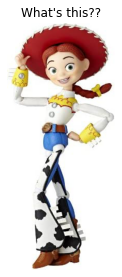

('n03908714', 'pencil_sharpener', 0.14578651)
('n03476684', 'hair_slide', 0.09858728)
('n03929660', 'pick', 0.04979374)
('n04116512', 'rubber_eraser', 0.044294268)
('n03908618', 'pencil_box', 0.041678965)
('n04228054', 'ski', 0.037755065)
('n04019541', 'puck', 0.033177327)
('n03041632', 'cleaver', 0.027443094)
('n04447861', 'toilet_seat', 0.02723183)
('n03291819', 'envelope', 0.026341991)


In [13]:
# 画像を指定する変数
# filename = "train/cat.101.jpg"
filename = "Jessy.jpg"

plt.figure( figsize=(20, 10) )
for i in range(1):
  showimg(filename, "What's this??", i+1 )
# ループ終わり
plt.show()

# 表示した画像を判定
results = predict( filename, 10 )
for result in results:
  print(result)